In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

## Install libraries

```bash
conda create -n edu4 python=3.10 jupyter matplotlib
```

```bash 
! pip install -U -r requirements.txt
```

```bash
! pip install -U numpy
! pip install -U scikit-learn
```

In [2]:
! ls

data
images
requirements.txt
workshop_1_linear_regression.ipynb
workshop_2_logistic_regression_lda_qda_nb.ipynb
workshop_3_resampling_methods.ipynb


In [3]:
! pip install -U -r requirements.txt

## Update repository

In [4]:
! git pull

Already up to date.


## Add import path

In [5]:
import os
import sys
import gc

In [6]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [7]:
del module_path

## Organize imports

In [8]:
import multiprocessing
from pathlib import Path

In [9]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import iqr
import sklearn
from sklearn import datasets
from sklearn.utils import resample
from sklearn.model_selection import (train_test_split, LeaveOneOut, KFold,
                                     RepeatedStratifiedKFold, cross_val_score)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, 
                                           QuadraticDiscriminantAnalysis)
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             classification_report, confusion_matrix)

#### Number of CPU cores

In [11]:
workers = multiprocessing.cpu_count()
workers

8

## Initialize path

In [12]:
DATA = Path('data')
REGRSN = DATA / 'linear_regression'
CLASSF = DATA / 'log_regr_lda_qda_np'
PUMPKIN_DIR = CLASSF / 'Pumpkin_Seeds_Dataset'
IRIS_DIR = CLASSF / 'iris'
PUMPKIN_DIR.mkdir(exist_ok=True, parents=True)
IRIS_DIR.mkdir(exist_ok=True, parents=True)

In [13]:
SEED = 2022

In [14]:
! ls

data
images
requirements.txt
workshop_1_linear_regression.ipynb
workshop_2_logistic_regression_lda_qda_nb.ipynb
workshop_3_resampling_methods.ipynb


## Multiple Linear Regression

In [15]:
pertol_consumption_path = REGRSN / 'petrol_consumption.csv'

In [16]:
df = pd.read_csv(pertol_consumption_path)
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [17]:
df.shape

(48, 5)

#### Data analysis

In [18]:
print(df.describe().round(2).T)

                              count     mean      std      min      25%  \
Petrol_tax                     48.0     7.67     0.95     5.00     7.00   
Average_income                 48.0  4241.83   573.62  3063.00  3739.00   
Paved_Highways                 48.0  5565.42  3491.51   431.00  3110.25   
Population_Driver_licence(%)   48.0     0.57     0.06     0.45     0.53   
Petrol_Consumption             48.0   576.77   111.89   344.00   509.50   

                                  50%      75%       max  
Petrol_tax                       7.50     8.12     10.00  
Average_income                4298.00  4578.75   5342.00  
Paved_Highways                4735.50  7156.00  17782.00  
Population_Driver_licence(%)     0.56     0.60      0.72  
Petrol_Consumption             568.50   632.75    968.00  


#### Prepare dataset

In [19]:
y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [21]:
X.shape, X_train.shape, X_test.shape

((48, 4), (38, 4), (10, 4))

In [22]:
regressor = LinearRegression(n_jobs=workers)
regressor.fit(X_train, y_train)

LinearRegression(n_jobs=8)

In [23]:
regressor.intercept_

499.0058612227565

In [24]:
regressor.coef_

array([-5.72964104e-02, -2.85484343e-03,  1.11587014e+03, -3.92450805e+01])

In [25]:
feature_names = X.columns
feature_names

Index(['Average_income', 'Paved_Highways', 'Population_Driver_licence(%)',
       'Petrol_tax'],
      dtype='object')

In [26]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

                              Coefficient value
Average_income                        -0.057296
Paved_Highways                        -0.002855
Population_Driver_licence(%)        1115.870140
Petrol_tax                           -39.245081


#### Inference with the model

In [27]:
y_pred = regressor.predict(X_test)
y_pred

array([428.43774447, 714.05396466, 526.08446241, 509.21780555,
       654.66965644, 349.66176109, 502.31634922, 557.4430578 ,
       569.12327533, 516.35456132])

In [28]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
22     464  428.437744
39     968  714.053965
25     566  526.084462
3      414  509.217806
40     587  654.669656
6      344  349.661761
7      467  502.316349
9      498  557.443058
43     591  569.123275
34     487  516.354561


#### Evaluate the model

In [29]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 64.40
Mean squared error: 8714.52
Root mean squared error: 93.35


In [30]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.6630382427097894


In [31]:
regressor.score(X_test, y_test)

0.6630382427097894

In [32]:
regressor.score(X_train, y_train)

0.6516872236248235

#### Evaluate the model with Leav-one-cross-validarion for estimators

In [33]:
#Define method to evaluate model
cv = LeaveOneOut()

#evaluate model
scores = cross_val_score(
    regressor, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=workers)

In [34]:
scores_mu = scores.mean() * 100.0
scores_std = scores.std() * 100.0
print(f'Accuracy: {np.sqrt(np.mean(np.absolute(scores)))}  mean = {scores_mu:.3f} std = {scores_std:.3f}')

Accuracy: 70.02991418302277  mean = -490418.888 std = 1008464.337


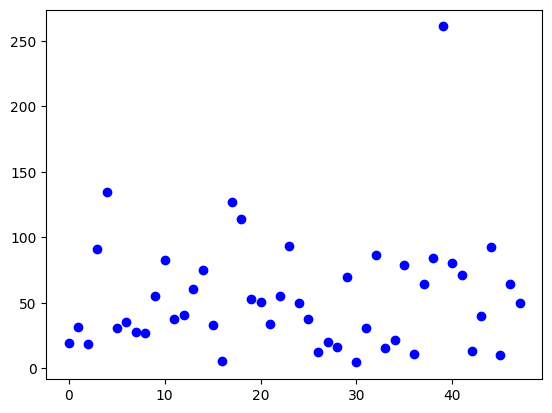

In [35]:
plt.plot(np.sqrt(np.absolute(scores)), 'bo')
plt.show()

## Logistic Regression

In [36]:
SEED = 2022

## Prepare data

In [37]:
pupkin_seeds_path = PUMPKIN_DIR / 'Pumpkin_Seeds_Dataset.xlsx'

In [38]:
df = pd.read_excel(pupkin_seeds_path)
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [39]:
df.shape

(2500, 13)

## Data analysis

In [40]:
df['Class'].value_counts() 

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,2500.0,80658.220800,13664.510228,47939.0000,70765.000000,79076.00000,89757.500000,136574.0000
Perimeter,2500.0,1130.279015,109.256418,868.4850,1048.829750,1123.67200,1203.340500,1559.4500
Major_Axis_Length,2500.0,456.601840,56.235704,320.8446,414.957850,449.49660,492.737650,661.9113
Minor_Axis_Length,2500.0,225.794921,23.297245,152.1718,211.245925,224.70310,240.672875,305.8180
Convex_Area,2500.0,81508.084400,13764.092788,48366.0000,71512.000000,79872.00000,90797.750000,138384.0000
Equiv_Diameter,2500.0,319.334230,26.891920,247.0584,300.167975,317.30535,338.057375,417.0029
Eccentricity,2500.0,0.860879,0.045167,0.4921,0.831700,0.86370,0.897025,0.9481
Solidity,2500.0,0.989492,0.003494,0.9186,0.988300,0.99030,0.991500,0.9944
Extent,2500.0,0.693205,0.060914,0.4680,0.658900,0.71305,0.740225,0.8296
Roundness,2500.0,0.791533,0.055924,0.5546,0.751900,0.79775,0.834325,0.9396


## Pre-processing the Data

In [42]:
y = df['Class']
X = df.drop(columns=['Class'], axis=1)

In [43]:
y = y.replace('Çerçevelik', 0).replace('Ürgüp Sivrisi', 1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.25, 
                                                    random_state=SEED)

In [45]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1875, 12), (1875,), (625, 12), (625,))

#### Scaling Data

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
column_names = df.columns[:12] # selecting all columns apart from Class from the original data
X_train = pd.DataFrame(X_train, columns=column_names)

#### Removing Outliers with IQR Method

Calculate quantiles and IQR to remove outliers
$$
Minimum = Q1 - 1.5*IQR
$$
and
$$
Maximum = Q3 + 1.5*IQR
$$

<img src="images/quantiles.png">Quartiles</img>

In [48]:
Q1 = X_train.quantile(q=.25)
Q3 = X_train.quantile(q=.75)

IQR = X_train.apply(iqr)

In [49]:
# Calculationg minimum and maximum values
minimum = X_train < (Q1-1.5*IQR)
maximum = X_train > (Q3+1.5*IQR)

# The tilde (~) is a reverse operator, 
# and it will select any row that is not below the minimum or above the maximum area, 
# this is our IQR filter
filter = ~(minimum | maximum).any(axis=1)

# We can now select the IQR rows in X_train
X_train = X_train[filter]

In [50]:
X_train.shape, y_train.shape, y_train.shape[0] - X_train.shape[0]

((1725, 12), (1875,), 150)

In [51]:
y_train = y_train.iloc[X_train.index]

In [52]:
y_train.shape

(1725,)

## Fit the Logistic Regression Model

In [53]:
logreg = LogisticRegression(random_state=SEED, 
                            n_jobs=workers)

In [54]:
# When fitting a DataFrame, rather than a bare NumPy array
# to avoid exceptions, we'll feed only the values without column names
logreg.fit(X_train.values, y_train)

LogisticRegression(n_jobs=8, random_state=2022)

In [55]:
y_pred = logreg.predict(X_test)

In [56]:
X_train[:3]

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,-0.891933,-1.083713,-1.448308,0.340364,-0.892945,-0.894549,-1.718182,-0.085025,0.092223,0.872875,-1.382440,1.552552
1,-0.799605,-1.006534,-0.981673,-0.139500,-0.796978,-0.793988,-0.625896,-0.252897,0.781677,0.898187,-0.753057,0.715458
2,1.385734,1.854232,2.048863,-0.123478,1.397683,1.366514,1.321126,-0.252897,0.282360,-1.560769,1.657765,-1.528181


In [57]:
y_pred[:3] 

array([0, 1, 0])

In [58]:
y_pred_proba = logreg.predict_proba(X_test)

In [59]:
y_pred_proba[:3]

array([[0.87228409, 0.12771591],
       [0.36192807, 0.63807193],
       [0.89133256, 0.10866744]])

## Evaluating the Model with Classification Reports

Precision:
$$
precision = \frac{\text{true positive}}{\text{true positive} + \text{false positive}}
$$

Recall:
$$
recall = \frac{\text{true positive}}{\text{true positive} + \text{false negative}}
$$

Accuracy:
$$
accuracy = \frac{\text{number of correct predictions}}{\text{total number of predictions}}
$$

f1-score:
$$
\text{f1-score} = 2* \frac{\text{precision} * \text{recall}}{\text{precision} + \text{recall}}
$$



In [60]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       335
           1       0.89      0.84      0.86       290

    accuracy                           0.88       625
   macro avg       0.88      0.87      0.88       625
weighted avg       0.88      0.88      0.88       625



<AxesSubplot: >

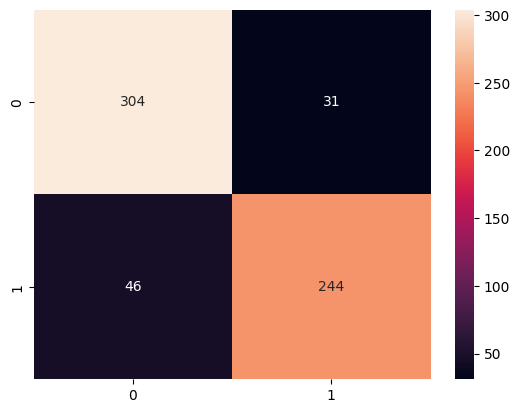

In [61]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [71]:
logreg.coef_

array([[ 1.52213973, -0.96660451,  0.15057051, -0.73385101,  1.47175643,
        -1.55723761, -1.29651816,  1.06812225,  0.02136034, -0.8846573 ,
         1.80223171, -1.65388141]])

In [72]:
logreg.intercept_

array([0.16442159])

Inferencee with Logistic Regression models:

$$
p{X} = \frac{e^{(b_0 + b_1 * x_1 + b_2 * x_2 + b_3 * x_3 + \ldots + b_n * x_n)}}{1 + e^{(b_0 + b_1 * x_1 + b_2 * x_2 + b_3 * x_3 + \ldots + b_n * x_n)}}
$$

## Inference / evaluate the model

In [73]:
logreg.predict_proba(X_test[:1])

array([[0.87228409, 0.12771591]])

Recall logits:

$$
ln \left( \frac{p}{1-p} \right)
$$

In [74]:
lp = logreg.predict_log_proba(X_test[:1])
lp

array([[-0.13664012, -2.05794691]])

In [75]:
np.exp(lp)

array([[0.87228409, 0.12771591]])

#### Evaluate with k-fold cross validation method

In [62]:
#Define method to evaluate model
cv = KFold(n_splits=10, shuffle=False)

#evaluate model
scores = cross_val_score(logreg, X, y, scoring='accuracy', cv=cv, n_jobs=workers)

In [63]:
scores_mu = scores.mean() * 100.0
scores_std = scores.std() * 100.0
print(f'Accuracy:  mean = {scores_mu:.3f} std = {scores_std:.3f}')

Accuracy:  mean = 85.320 std = 4.028


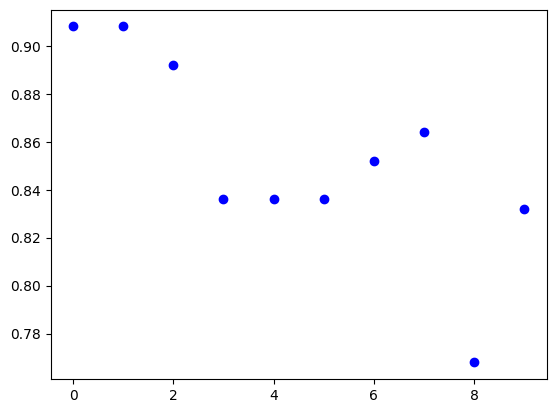

In [64]:
plt.plot(scores, 'bo')
plt.show()

## Linear discriminant analysis

In [65]:
! ls {IRIS_DIR}

Iris.csv        database.sqlite


In [66]:
df = pd.read_csv(IRIS_DIR / 'Iris.csv')

In [67]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [68]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [69]:
y = df['Species']
X = df.drop(columns=['Id', 'Species'], axis=1)
X.shape, y.shape, df['Species'].value_counts()

((150, 4),
 (150,),
 Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 Name: Species, dtype: int64)

```python
# #define predictor and response variables
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']
X.shape, y.shape
```

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED)

## Train the model

In [71]:
lda = LinearDiscriminantAnalysis()

In [73]:
lda = lda.fit(X_train, y_train)
lda

LinearDiscriminantAnalysis()

#### Evluate the model

In [74]:
y_pred = lda.predict(X_test)

In [75]:
cr = classification_report(y_test, y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



<AxesSubplot: >

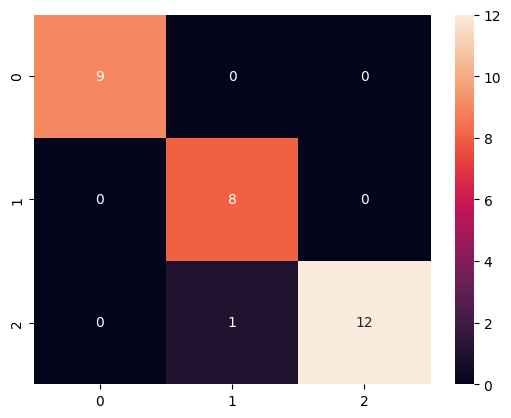

In [76]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

#### Evaluate the model K-folds CV times

In [78]:
#Define method to evaluate model
cv = KFold(n_splits=10, shuffle=False)

#evaluate model
scores = cross_val_score(lda, X, y, scoring='accuracy', cv=cv, n_jobs=workers)

In [79]:
scores_mu = scores.mean() * 100.0
scores_std = scores.std() * 100.0
print(f'Accuracy:  mean = {scores_mu:.3f} std = {scores_std:.3f}')

Accuracy:  mean = 96.667 std = 6.146


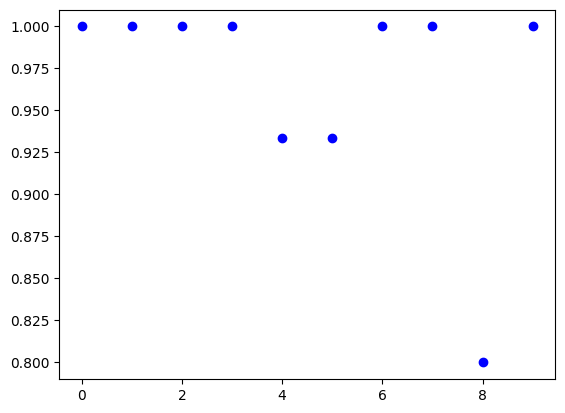

In [80]:
plt.plot(scores, 'bo')
plt.show()